In [1]:
#this functions are in the folder /results (add them to your path using sys.path.append() and install if something is missing
import sys
sys.path.insert(1, 'results')

from model import *
from plot_functions import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


In [2]:
#Palettes
#print(sns.color_palette("tab10").as_hex())
#sns.palplot(sns.color_palette("tab10"))
#plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

## Phantom bumps

***Phantom 1 means there is a phantom in st1  
Phantom 2 means there is a phantom in st2***

In [50]:
def hemap_p(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([500, 900], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    #plt.gca().set_xticks([])
    plt.gca().set_xticks([0,an[4].shape[1]/2, an[4].shape[1]])
    plt.gca().set_xticklabels(['0', str(an[4].shape[1]), str(an[4].shape[1]*2)], rotation=0)
    #axn.set_xticks([0,simul[4].shape[1]/2, simul[4].shape[1]])
    plt.gca().set_xticklabels(['0s', str(an[4].shape[1]/1000) + 's', str( int(an[4].shape[1]*2/1000) ) + 's'], rotation=0)
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_xlabel('time (ms)');
    plt.gca().set_ylabel('neuron ($^\circ$)');

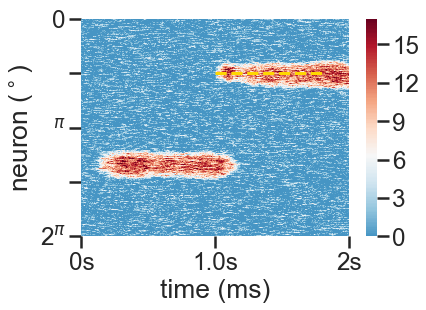

In [31]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

phantom_on= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phantom_on = 'on', phnatom_duration=300)

hemap_p(phantom_on)

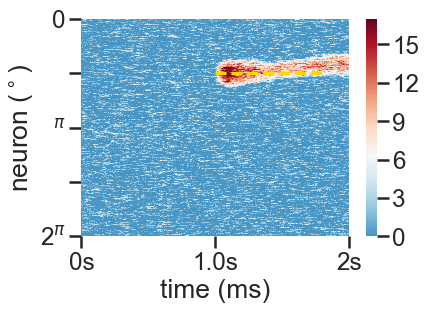

In [33]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

phantom_off= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phantom_on = 'on', phnatom_duration=500)

hemap_p(phantom_off)

### Simulations phantom

## Phantom 1

In [15]:

p_targ2 = int((N * 90)/360)
p_dist = int((N * (90) )/360)
p_dist2 = int((N * (90+170) )/360)

def hemap_p(an, stimulation, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color ='k', linewidth=lw_t) 
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k--', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k--', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k--', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k--', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k--', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)

### Examples

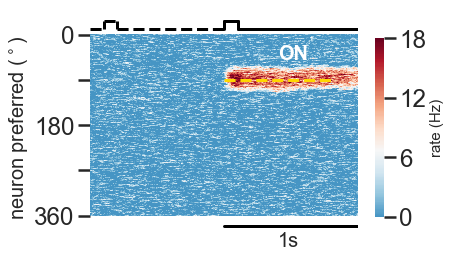

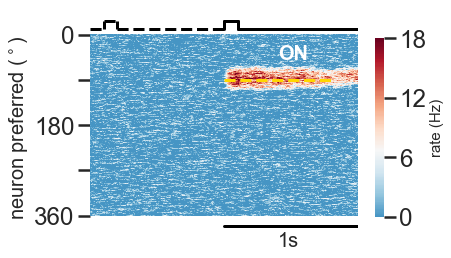

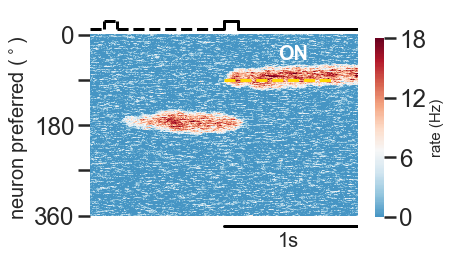

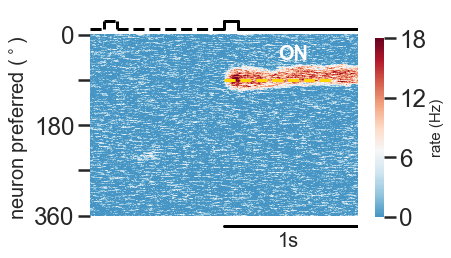

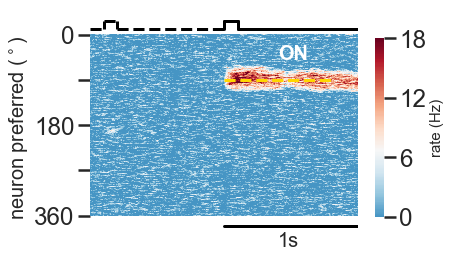

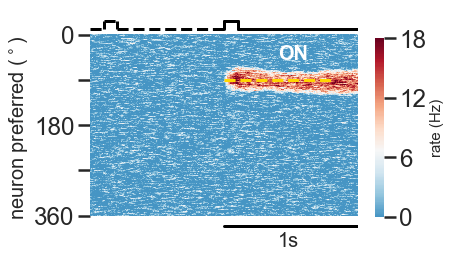

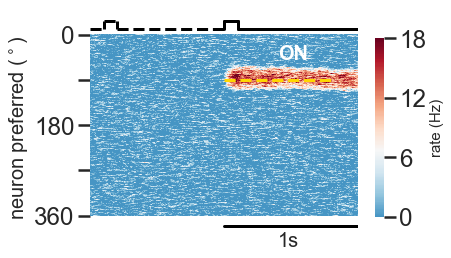

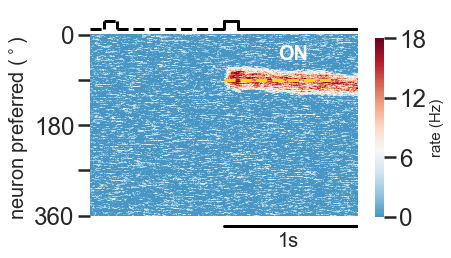

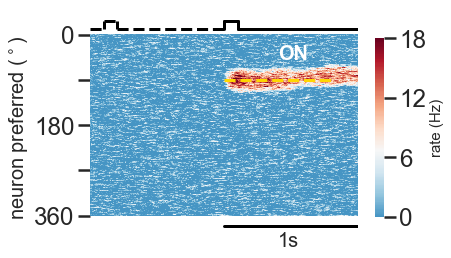

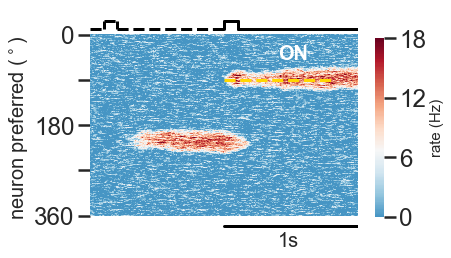

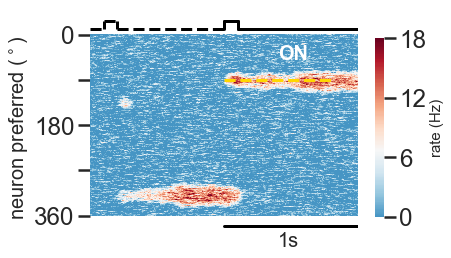

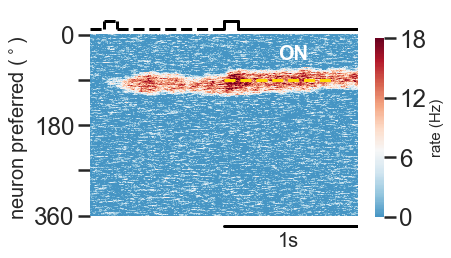

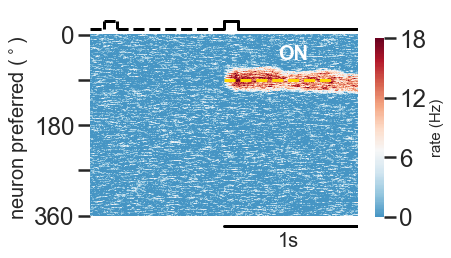

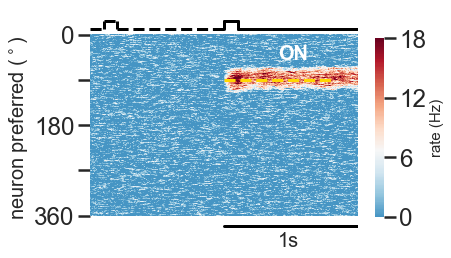

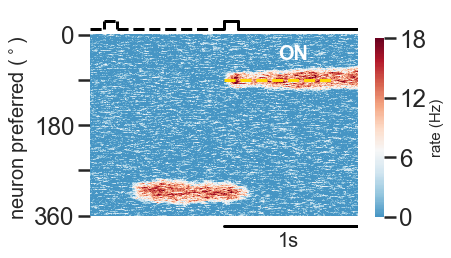

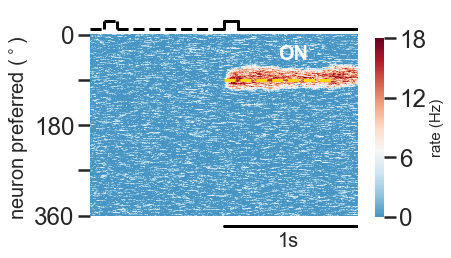

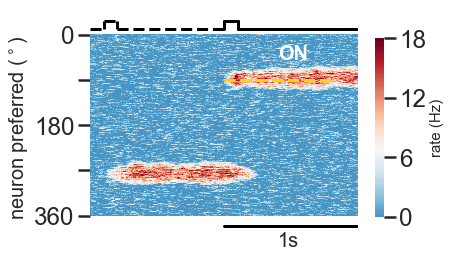

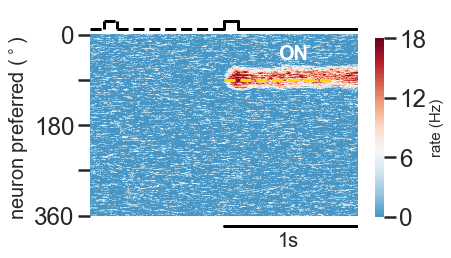

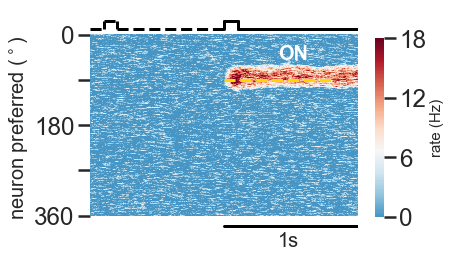

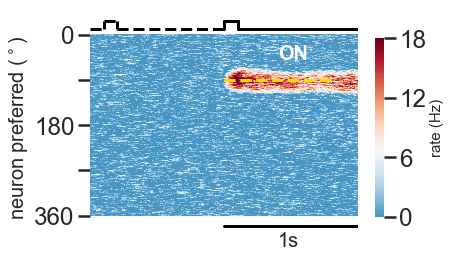

In [12]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=20
firing_phant_on=[]
firing_all_on =[]
RE_on=[]
RE_on_stim=[]

for g in range(n_sim_ph):
    on2= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phantom_on='on', phnatom_duration=300)
    hemap_p(on2, 'ON', 2)
    plt.show()
    RE_on.append(on2[4][:, 50:500])
    RE_on_stim.append(on2[4][:, 500:])
    mean_firing=on2[4][:, 50:500].mean()
    firing_phant_on.append(mean_firing)
    firing_all_on.append( on2[4].mean(axis=0) )

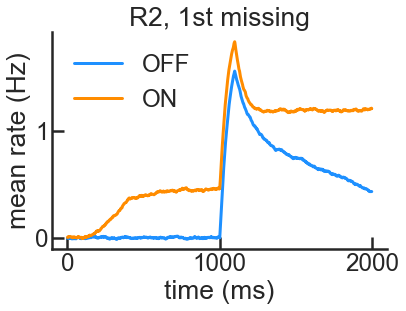

In [81]:
#np.save('f_on.npy', firing_all_on)
#np.save('f_off.npy', firing_all_off)

firing_all_on=np.load('results/f_on.npy')
firing_all_off=np.load('results/f_off.npy')

%config InlineBackend.figure_format = 'png' ## 'svg'

plt.plot(np.mean(firing_all_off, axis=0), label='OFF', color=c_off )
plt.plot(np.mean(firing_all_on, axis=0), label='ON', color=c_on )
plt.legend(frameon=False)
plt.title('')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0, 500, 1000])
plt.gca().set_xticklabels(['0', '1000', '2000'], rotation=0)
plt.title('R2, 1st missing')
plt.ylabel('mean rate (Hz)')
plt.xlabel('time (ms)');
#r'abs error ($^\circ$)'
#plt.ylim(-2,17);

In [56]:
pop_stim_max_off= np.array(RE_off_stim).max()
pop_stim_max_on = np.array(RE_on_stim).max()
wind=70

off=[] ## no stimulation

for i in range(len(RE_off)):
    b = RE_off[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_off[i].mean(axis=1) if x not in b]
    off.append(c /   pop_stim_max_off) ### RE_off_stim[i].max(axis=1)) 
    
    
off = list(itertools.chain.from_iterable(off))


on=[] ## stimulation

for i in range(len(RE_on)):
    b = RE_on[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_on[i].mean(axis=1) if x not in b]
    on.append( c/ pop_stim_max_on) ### RE_on_stim[i].max(axis=1)) 
    
    
on = list(itertools.chain.from_iterable(on))

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


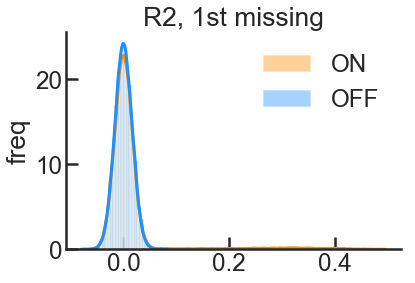

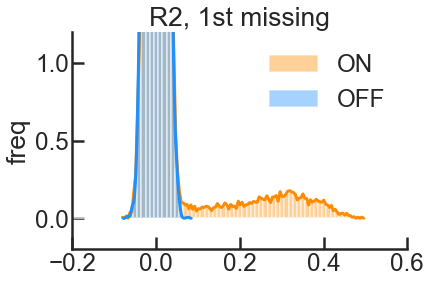

In [76]:
sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
#plt.ylim(-0.1, 7. )
plt.title('R2, 1st missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()


sns.distplot(on, color=c_on, label='ON', bins=np.linspace(-1, 1, 200) )
sns.distplot(off, color=c_off, label='OFF', bins=np.linspace(-1, 1, 200))
plt.ylim(-0.2, 1.2 );
plt.xlim(-0.2, 0.6 );
#plt.title('max st1 / bump max st2')
plt.title('R2, 1st missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()
#plt.xlim(-1000,1000)

## Phantom 2


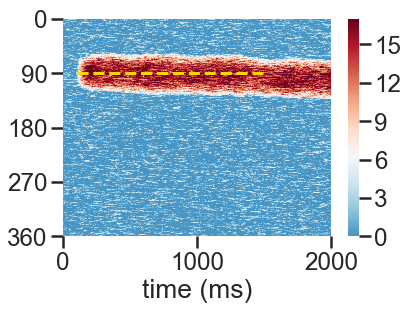

In [56]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=10000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=1000, phnatom_duration=300, phantom_on = 'off')

hemap(on)

## Simulations

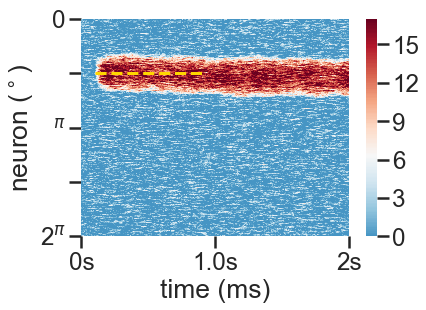

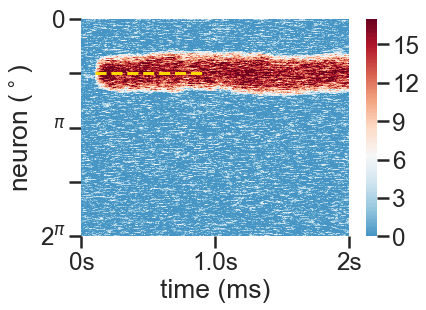

In [82]:
%config InlineBackend.figure_format = 'png' ## 'svg'

fee=1
fei=1
fie=1
fii=1

n_sim_ph=2#00
firing_phant_on2=[]
firing_all_on2 =[]
RE_on2=[]
RE_on_stim2=[]

for g in range(n_sim_ph):
    on2= model(totalTime=2000, targ_onset_1=100, targ_onset_2=10000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=1000, phnatom_duration=300, phantom_on = 'off')
    hemap(on2)
    plt.show()
    RE_on2.append(on2[4][:, 50:400])
    RE_on_stim2.append(on2[4][:, 500:])
    mean_firing=on2[4][:, 50:500].mean()
    firing_phant_on2.append(mean_firing)
    firing_all_on2.append( on2[4].mean(axis=0) )

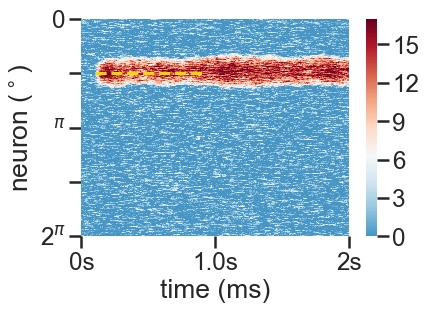

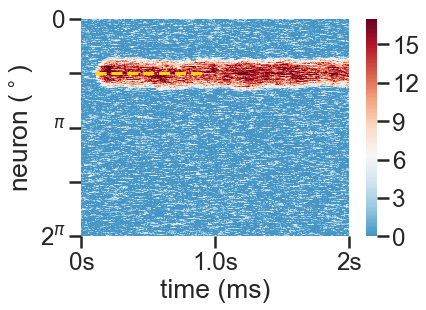

In [81]:
fee=1
fei=1
fie=1
fii=1

n_sim_ph=2#00
firing_phant_off2=[]
RE_off_stim2=[]
RE_off2=[]
firing_all_off2=[]

for g in range(n_sim_ph):
    on2= model(totalTime=2000, targ_onset_1=100, targ_onset_2=10000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=1000, phnatom_duration=300, phantom_on = 'off')
    hemap(on2)
    plt.show()
    mean_firing=on2[4][:, 50:400].mean()
    RE_off2.append(on2[4][:, 50:500])
    RE_off_stim2.append(on2[4][:, 500:])
    firing_phant_off2.append(mean_firing)
    firing_all_off2.append( on2[4].mean(axis=0) )

Text(0.5, 1.0, 'R1, 2nd missing')

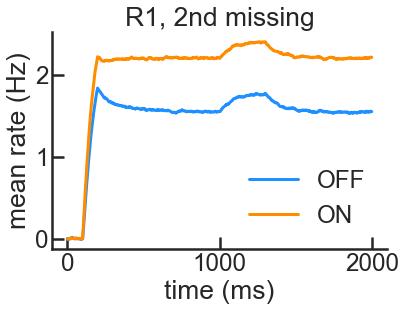

In [77]:
plt.plot(np.mean(firing_all_off2, axis=0), label='OFF', color=c_off )
plt.plot(np.mean(firing_all_on2, axis=0), label='ON', color=c_on )
plt.legend(frameon=False)
plt.title('')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0, 500, 1000])
plt.gca().set_xticklabels(['0', '1000', '2000'], rotation=0)
plt.ylabel('mean rate (Hz)')
plt.xlabel('time (ms)');
plt.title('R1, 2nd missing')

#r'abs error ($^\circ$)'
#plt.ylim(-2,17);

In [67]:
pop_stim_max_off2 = np.array(RE_off2).max()
pop_stim_max_on2 = np.array(RE_on2).max()
wind=70

off2=[] ## no stimulation

for i in range(len(RE_off2)):
    b = RE_off_stim2[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_off_stim2[i].mean(axis=1) if x not in b]
    off2.append(c /   pop_stim_max_off2) ### RE_off_stim[i].max(axis=1)) 
    
    
off2 = list(itertools.chain.from_iterable(off2))


on2=[] ## stimulation

for i in range(len(RE_on2)):
    b = RE_on_stim2[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_on_stim2[i].mean(axis=1) if x not in b]
    on2.append( c/ pop_stim_max_on2) ### RE_on_stim[i].max(axis=1)) 
    
    
on2 = list(itertools.chain.from_iterable(on2))

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


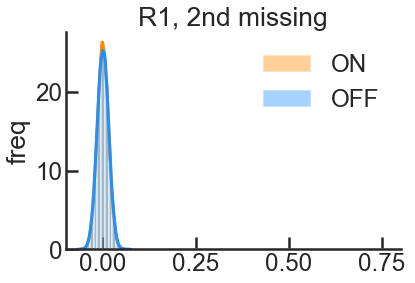

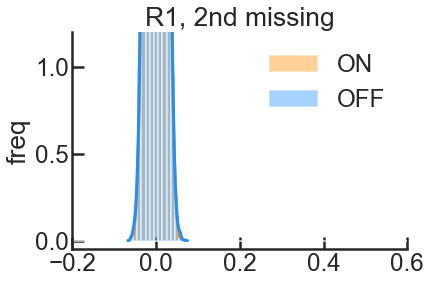

In [78]:
%config InlineBackend.figure_format = 'png' ## 'svg'

sns.distplot(on2, color=c_on, label='ON', bins=np.linspace(-1, 1, 200) )
sns.distplot(off2, color=c_off, label='OFF', bins=np.linspace(-1, 1, 200))
# sns.distplot(on1, color=c_on, label='ON')
# sns.distplot(off1, color=c_off, label='OFF')
#plt.ylim(-0.1, 4.5 )
plt.xlim(-0.1, 0.8 );
plt.title('R1, 2nd missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()


sns.distplot(on2, color=c_on, label='ON', bins=np.linspace(-1, 1, 200))
sns.distplot(off2, color=c_off, label='OFF',bins=np.linspace(-1, 1, 200))
plt.ylim(-0.05, 1.2 );
#plt.xlim(-0.1, 0.8 );
plt.xlim(-0.2, 0.6 );
plt.title('R1, 2nd missing')
#plt.title('neuron mean st1 / pop max st2')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()
#plt.xlim(-1000,1000)